# Homework 1

### William Wu

## Question 1

a). Q (It's vague, but you can query data to find customers who, for example, spend above a certain amount)

b). Q (Exposure, Registration, Past Purchases, and Purchase status are all good columns for a SQL Query)

(letter c was skipped in the homework document)

d). U (There is no objective)

e). S (There's an objective: Identifying Customers Who Respond)

f). S (There's an objective: Identifying Characteristics of Customers)

g). S (There's an objective: Timing of Donors)

## Question 2

We can evaluate this by calculating and comparing entropies to find the information gain in each model and compare them.

**The entropy equation is:**

-(p1 x log2(p1) + p2 x log2(p2)…..+pn x log2(pn))

where p is the probability of a certain class.

**and the information gain equation is:**

entropy of parent node - (entropy of childn x pchildn)

**The Entropy of the Parent Node is:**

In [19]:
import math
parent = -((7/15) * math.log(7/15,2) + (8/15) * math.log(8/15,2))
round(parent,3)

0.997

### Case 1
#### (+) is p1, (-) is p2

Node 1: Homework1 <91

In [16]:
node1 = -((1/7) * math.log(1/7,2) + (6/7) * math.log(6/7,2))
round(node1,3)

0.592

Node 2: Homework >=91

In [17]:
node2 = -((6/8) * math.log(6/8,2) + (2/8) * math.log(2/8,2))
round(node2,3)

0.811

Information Gain on Case 1

In [18]:
Case1InfoGain = parent - node1*(7/15) - node2*(8/15)
round(Case1InfoGain,3)

0.288

### Case 2
#### (+) is p1, (-) is p2

Node 1: Homework2 <= 89 

In [21]:
node1 = -((2/5) * math.log(2/5,2) + (3/5) * math.log(3/5,2))
round(node1,3)

0.971

Node 2: Homework 2 < 95

In [22]:
node2 = -((2/5) * math.log(2/5,2) + (3/5) * math.log(3/5,2))
round(node2,3)

0.971

Node 3: Homework 3 >= 95

In [14]:
node3 = -((2/5) * math.log(2/5,2) + (3/5) * math.log(3/5,2))
round(node3,3)

0.971

Information Gain on Case 2

In [23]:
Case2InfoGain = parent - node1*(5/15) - node2*(5/15) - node3*(5/15)
round(Case2InfoGain,3)

0.026

### Question 2 Conclusion

The information gained in Case 1 was 0.288 as opposed to the information gain on Case 2 which was 0.026. Since the information gained in Case 1 was higher, we would choose this method to partition the students.

## Question 3

Churn in this context is how many of the customers stay with the cell provider vs how many of them switch or drop. One possible target variable would be:

Percentage of Customers who renew their contracts either before expiring or after a specific amount of time from expiration.


## Question 4

The confusion matrix is built out as follows:

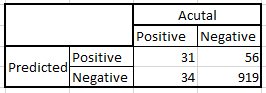

In [35]:
Total = 1040
TP = 31  ## True Positive (Actual Fraud Predicted)
FP = 56  ## False Positive (Predicted Fraud that wasn't Fraud)
FN = 34  ## False Negative (Acutal Fraud Undetected)
TN = 919 ## True Negative (Not Fraud Classified as Not Fraud)

**Error Rate**

In [36]:
Error_Rate = (FP+FN)/Total
round(Error_Rate,3)

0.087

**Accuracy Rate**

In [33]:
AR = (TP+TN)/Total
round(AR,3)

0.913

**Precision**

In [34]:
Precision_Fraud = TP/(TP+FP)
round(Precision_Fraud,3)

0.356

In [37]:
Precision_NotFraud = TN/(TN+FN)
round(Precision_NotFraud,5)

0.96432

**Recall**

In [39]:
Recall_F = TP/(TP+FN)
round(Recall_F,3)

0.477

In [40]:
Recall_NF = TN /(TN+FP)
round(Recall_NF,3)

0.943

**F-Measure**

In [41]:
F_F = 2*Precision_Fraud*Recall_F / (Precision_Fraud + Recall_F)
round(F_F,3)

0.408

In [42]:
F_NF = 2*Precision_NotFraud*Recall_NF / (Precision_NotFraud + Recall_NF)
round(F_NF,3)

0.953

**Naive (Majority) Accuracy Rate**

Classifying All Records as Non-Fraud. All and Only Non-Frauds are Correct.

In [43]:
Correct = 919+56
Total = 1040
NAR = Correct/Total
round(NAR,3)

0.938

# Question 5

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn import tree
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn import linear_model
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import warnings
warnings.filterwarnings('ignore')

## Data Exploration

In [20]:
bc_df = pd.read_csv("wdbc.data", header = None)
bc_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
features = bc_df.iloc[:,2:33].values
target = bc_df.iloc[:,1].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size= 0.2, stratify = target)

Our target variable for our models is whether or not the tumor is malignant or benign. With this in mind, we split the data 80/20 training/testing.

## Decision Tree

In [142]:
complexity_values = range(1,25)
weight_options = ["gini", "entropy"]
max_nodes = [5, 15, None]
min_purity = [0, 0.5, .1]

param_grid = dict(max_depth = complexity_values, criterion = weight_options,
                  max_leaf_nodes = max_nodes, min_impurity_decrease = min_purity)

clf_dt = tree.DecisionTreeClassifier()

grid = GridSearchCV(clf_dt, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(x_train,y_train)


print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)
print("Prediction Accuracy: ",accuracy_score(y_test, grid.predict(x_test)))

0.94750656167979
{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 15, 'min_impurity_decrease': 0}
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=15, min_impurity_decrease=0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Prediction Accuracy:  0.9202127659574468


In [143]:
clf_dt = grid.fit(x_train,y_train)
y_predict = clf_dt.predict(x_test)
confusion_matrix(y_test,y_predict)

array([[117,   7],
       [  5,  59]], dtype=int64)

In [144]:
precision_recall_fscore_support(y_test, y_predict)

(array([0.95901639, 0.89393939]),
 array([0.94354839, 0.921875  ]),
 array([0.95121951, 0.90769231]),
 array([124,  64], dtype=int64))

## Logistic Regression

In [132]:
param_grid ={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

clf_lr = linear_model.LogisticRegression()

grid = GridSearchCV(clf_lr, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(x_train,y_train)


print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)
print("Prediction Accuracy: ",accuracy_score(y_test, grid.predict(x_test)))


0.9553805774278216
{'C': 1000}
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Prediction Accuracy:  0.9521276595744681


In [133]:
clf_lr = grid.fit(x_train,y_train)
y_predict = clf_lr.predict(x_test)
confusion_matrix(y_test,y_predict)

array([[120,   4],
       [  5,  59]], dtype=int64)

In [134]:
precision_recall_fscore_support(y_test, y_predict)

(array([0.96      , 0.93650794]),
 array([0.96774194, 0.921875  ]),
 array([0.96385542, 0.92913386]),
 array([124,  64], dtype=int64))

## K-NN Classification

In [138]:
clf_knn = neighbors.KNeighborsClassifier()

k_range = list(range(1,20))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)

grid = GridSearchCV(clf_knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(x_train,y_train)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)
print("Prediction Accuracy: ",accuracy_score(y_test, grid.predict(x_test)))

0.937007874015748
{'n_neighbors': 5, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
Prediction Accuracy:  0.9414893617021277


In [139]:
clf_knn = grid.fit(x_train,y_train)
y_predict = clf_knn.predict(x_test)
confusion_matrix(y_test,y_predict)

array([[117,   7],
       [  4,  60]], dtype=int64)

In [140]:
precision_recall_fscore_support(y_test, y_predict)

(array([0.96694215, 0.89552239]),
 array([0.94354839, 0.9375    ]),
 array([0.95510204, 0.91603053]),
 array([124,  64], dtype=int64))

## Model Selection

When comparing models, we mainly look at the accuracy, precision and recall scores for each model. In the context of detecting breast cancer these metrics for the positive case have the following interpetations:

Accuracy: Percentage of tumors that were correctly identified, both benign and malignant.

Precision: Out of all the tumors identified as malignant, how many of them were truly malignant?

Recall: Out of all the tumors that were identified as benign, how many of them were truly benign?

In this case, the most important metric is recall. We want to successfully detect cases of breast cancer and allowing it to go undetected could be a potentially fatal error. Precision error only means that a patient pays a little extra money to err on the side of caution while accuracy is more of a measurement of the model being viable as a whole.

Knowing this, the Logisitic Regression Model has the highest recall of the models we created. LR and Decision tree have comparable accuracies while K-NN is lower, while precision is similar across the board. In focusing on the recall metric, we aren't trading off a significant amount of error in the other models. The Logisitic Regression Model is the one we would select due to its high recall.